<a href="https://colab.research.google.com/github/santi11031/Analisis-de-datos/blob/main/Modelo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo modelo de inteligencia artifical
En este modelo no se tendrán los mismos errores de antes sino que por se buscará mediante este crear un modelo de inteligencia artificial que pueda predecir los valores de gravedad en Colombia basados en la ubicación del sitio y también la altura del terreno, de esta manera se puede hacer mucho más efectivo el entrenamiento del modelo y también servirá mucho para futuros estudios relacionados con estos modelos.



In [32]:
DatosModelo.to_csv('/content/drive/MyDrive/Geofisica/DatosModelo.csv')

# Importación de las librerías que se utilizarán

In [6]:
pip install pygeohash

  Preparing metadata (setup.py) ... done
  Created wheel for pygeohash: filename=pygeohash-1.2.0-py2.py3-none-any.whl size=6151 sha256=0fd602a4be02429f1b59e477de094b23dcc2d652c8cd7af468eb4c734659636e
  Stored in directory: /root/.cache/pip/wheels/28/ec/b6/beadf7295a623f528507691fb0d471b50d064ae9bbad420b8f
Successfully built pygeohash


In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import pygeohash as pgh
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DatosIniciales=pd.read_csv('/content/drive/MyDrive/Geofisica/ValoresFInales.csv')

In [4]:
DatosIniciales.head()

,Unnamed: 0,x,y,Xarreglada,Altura,Gravedad,GravedadTeorica(Miligales),Observada,CorreccionTopografica,CorreccionBouguer,...,Densidad1,Densidad2,ModeloAiry1,ModeloAiry2,CorreccionPratt,CorreccionAireLibre,AnomaliaAireLibre,AnomaliaBouguerTotal,AnomaliaAiry,AnomaliaPratt
0,0,282.2416,9.4815,-77.7584,-1694,-84.0,978189.9637,977583.2630,61.553471,70.993585,...,2930.707626,3101.188258,-4964618.718,-5253412.909,772.497534,522.70064,-84.0,48.684467,28.864986,821.182000
1,1,282.2583,9.4815,-77.7417,-1684,-86.2,978189.9637,977584.1486,61.553471,70.574497,...,2931.274669,3100.753374,-4936266.543,-5221668.682,767.143695,519.61504,-86.2,46.071753,26.352646,813.215448
2,2,282.2750,9.4815,-77.7250,-1683,-87.7,978189.9637,977582.9572,61.553471,70.532588,...,2931.331386,3100.709895,-4933430.723,-5218494.753,766.608867,519.30648,-87.7,44.552245,24.843184,811.161112
3,3,282.2917,9.4815,-77.7083,-1553,-88.0,978189.9637,977622.7700,55.505030,65.084438,...,2938.723256,3095.072966,-4563837.217,-4806648.316,697.938025,479.19368,-88.0,32.728680,14.340720,730.666705
4,4,282.3083,9.4815,-77.6917,-1607,-87.1,978189.9637,977607.0077,55.505030,67.347516,...,2935.648265,3097.410783,-4717586.762,-4977539.128,726.257020,495.85592,-87.1,35.896524,16.956164,762.153544


In [9]:
DatosModelo={'Latitud':DatosIniciales['y'],'Longitud':DatosIniciales['Xarreglada'],'Altura':DatosIniciales['Altura'],'Observada':DatosIniciales['Observada']}

DatosModelo=pd.DataFrame(DatosModelo)

In [10]:
DatosModelo.head(5)

,Latitud,Longitud,Altura,Observada
0,9.4815,-77.7584,-1694,977583.2630
1,9.4815,-77.7417,-1684,977584.1486
2,9.4815,-77.7250,-1683,977582.9572
3,9.4815,-77.7083,-1553,977622.7700
4,9.4815,-77.6917,-1607,977607.0077


### Diseño del geohash con la esperanza de que se pueda tener una geocodificación mucho mejor planteada

In [23]:
Geo=[]
for x,y in zip(DatosModelo['Latitud'],DatosModelo['Longitud']):

  Iterador=pgh.encode(x,y, precision=3)
  Geo.append(Iterador)

In [24]:
DatosModelo['GeoHash']=Geo

In [25]:
len(DatosModelo['GeoHash'].unique())


3

In [27]:
DatosModelo['GeoHash'].unique()


array(['d38', 'd39', 'd3d'], dtype=object)

In [30]:
DatosModelo = pd.get_dummies(DatosModelo, columns=['GeoHash'], prefix=['GeoHash'])


In [31]:
DatosModelo

,Latitud,Longitud,Altura,Observada,GeoHash_d38,GeoHash_d39,GeoHash_d3d
0,9.4815,-77.7584,-1694,977583.2630,1,0,0
1,9.4815,-77.7417,-1684,977584.1486,1,0,0
2,9.4815,-77.7250,-1683,977582.9572,1,0,0
3,9.4815,-77.7083,-1553,977622.7700,1,0,0
4,9.4815,-77.6917,-1607,977607.0077,1,0,0
...,...,...,...,...,...,...,...
6040,8.8563,-75.2584,45,978115.8468,0,0,1
6041,8.8563,-75.2417,37,978116.6152,0,0,1
6042,8.8563,-75.2250,29,978117.0837,0,0,1
6043,8.8563,-75.2083,27,978115.3008,0,0,1


In [65]:
DatosEntrenamiento=DatosModelo.sample(frac=0.8,random_state=0)
DatosPrueba=DatosModelo.drop(DatosEntrenamiento.index)

In [63]:
len(DatosEntrenamiento)

4836

In [43]:
len(DatosPrueba)


1209

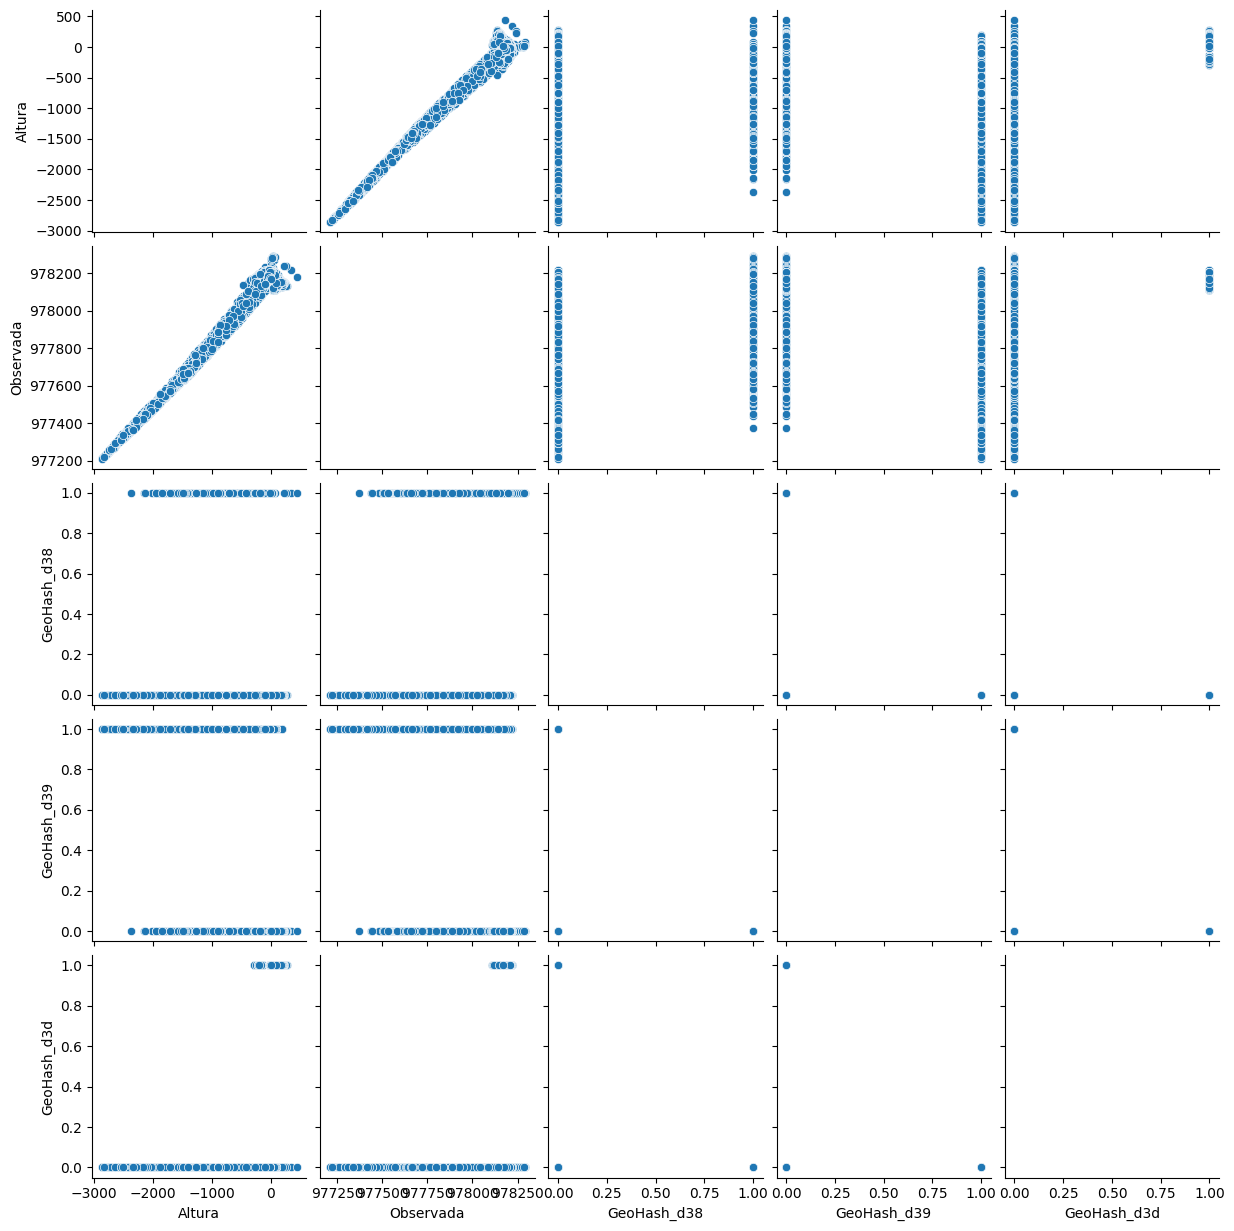

In [44]:
sns.pairplot(DatosEntrenamiento[['Altura', 'Observada','GeoHash_d38','GeoHash_d39','GeoHash_d3d']], diag_kind=True)

In [68]:
DatosEFinales=DatosEntrenamiento.pop('Observada')
DatosPFinales=DatosPrueba.pop('Observada')


In [66]:
DatosEntrenamiento.head(1)

,Latitud,Longitud,Altura,Observada,GeoHash_d38,GeoHash_d39,GeoHash_d3d
247,9.4651,-76.225,-58,978208.7845,0,1,0


In [67]:
EtiquetaEntrenamiento=DatosEntrenamiento['Observada']
EtiquetaPrediccion=DatosPrueba['Observada']

In [103]:
def build_model():
  model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[len(DatosEFinales.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae','mse'])
  return model

In [104]:
modelo= build_model()


In [105]:
modelo.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               1280      
                                                                 
 dense_22 (Dense)            (None, 64)                16448     
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17793 (69.50 KB)
Trainable params: 17793 (69.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000


history = modelo.fit(
  DatosEFinales, EtiquetaEntrenamiento,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)


In [109]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,389776928.0,8689.699219,389776928.0,608596544.0,15027.715820,608596544.0,995
996,469622752.0,10131.784180,469622752.0,284646176.0,10325.512695,284646176.0,996
997,403593184.0,9084.989258,403593184.0,840638080.0,18154.152344,840638080.0,997
998,428862272.0,10272.669922,428862272.0,47055900.0,3728.629639,47055900.0,998
999,443564416.0,10384.013672,443564416.0,32398232.0,3056.343018,32398232.0,999


In [86]:
DatosEFinales

,Altura,GeoHash_d38,GeoHash_d39,GeoHash_d3d
247,-58,0,1,0
5683,79,0,1,0
3030,-14,0,1,0
1850,171,0,0,1
4587,21,0,1,0
...,...,...,...,...
2020,-1481,1,0,0
5389,11,0,0,1
367,-2510,0,1,0
3436,-1399,0,1,0
